# What is the True Normal Human Body Temperature? 

## Daniel Lee

### July 13, 2018

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [276]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics
import statsmodels.api as sm
from scipy import stats
from scipy.stats import t
from scipy.stats import norm
from scipy.stats import f
from scipy.stats import ttest_ind

In [277]:
df = pd.read_csv('data_human_temperature/human_body_temperature.csv')

## 1. Is the distribution of body temperatures normal? 
   
* Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
* Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test



To test for normality, I will perform graphical methods as well as a hypothesis test.

1. Plot the histogram of the sample and compare it to a histogram of a theoretical normal distribution.
2. Plot the ECDF of the sample and compare it to the CDF of a theoretical normal distribution.
3. Create a qq-plot where I compare the quantiles of the sample to the quantiles of a theoretical normal distribution.
4. Run the Shapiro-Wilk test at the 0.05 significance level.

In [278]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

In [279]:
# create temperature object that contains all the temperatures
temperature = df.temperature
len(temperature)

130

In [280]:
# create x and y values for ecdf
x_ecdf, y_ecdf = ecdf(temperature)

In [281]:
# calculate mean and standard deviation of sample to create samples from normal distribution with same mean and sd as sample
temp_mean = np.mean(temperature)
temp_sd = statistics.stdev(temperature) # sample sd
temp_theo = np.random.normal(loc = temp_mean, scale = temp_sd, size = len(temperature))

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


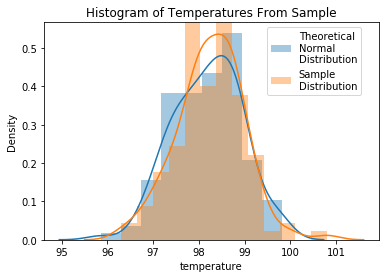

In [282]:
# create histogram of theoretical normal distribution vs sample distribution
_ = sns.distplot(temp_theo)
_ = sns.distplot(temperature, norm_hist = True)
_ = plt.title('Histogram of Temperatures From Sample')
_ = plt.ylabel('Density')
_ = plt.legend(('Theoretical\nNormal\nDistribution', 'Sample\nDistribution'), bbox_to_anchor = (0.65, 1))
plt.show()

From a sample size of 130, it seems that the distribution of temperatures are pretty normally distributed. I see some deviation in that the sample distribution might have a slightly long right tail (slightly right-skewed).

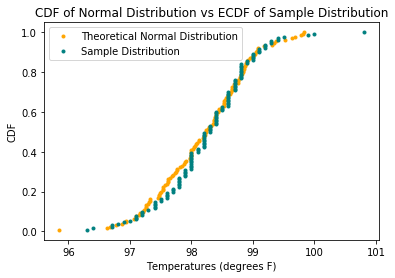

In [283]:
# Compute ECDFs for both theoretical normal distribution and sample
x_theo, y_theo = ecdf(temp_theo)
x_actual, y_actual = ecdf(temperature)

# Plot both ECDFs on the same plot
_ = plt.plot(x_theo, y_theo, marker = '.', linestyle = 'none', color = 'orange')
_ = plt.plot(x_actual, y_actual, marker = '.', linestyle = "none", color = 'teal')
_ = plt.legend(('Theoretical Normal Distribution', 'Sample Distribution'))
_ = plt.title('CDF of Normal Distribution vs ECDF of Sample Distribution')
_ = plt.xlabel('Temperatures (degrees F)')
_ = plt.ylabel('CDF')
plt.show()

From the comparison of ECDF to the theoretical CDF of a normal distribution with the same mean and standard deviation, I see that there's a slight deviation. The sample distribution has most of its mass concentrated in the center and also has a few outliers at the right tail end.

Another way to test for normality graphically is by generating a QQ-plot and inspecting the distributions visually.

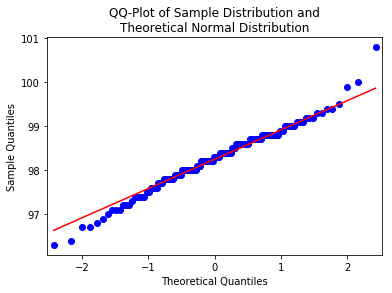

In [284]:
_ = sm.qqplot(temperature, line = 'q')
_ = plt.title('QQ-Plot of Sample Distribution and\nTheoretical Normal Distribution')
plt.show()

From the QQ-plot, I see that at the left tail of the distribution, the sample quantiles are lower than the expected values if they were normally distributed. At the right tail, I see that three points are higher than the expected values if they were normally distributed. This indicates that the sample distribution has longer tails than the theoretical normal distribution. But the deviation from the normal distribution is small. So, it seems that the sample distribution is more-or-less normal.

Another way to examine if the distribution is normal is by performing the Shapiro-Wilk Test.

1. Null Hypothesis: The sample temperatures were sampled from a normal distribution.
2. Alternative Hypothesis: The sample temperatures were not sampled from a normal distribution.

In [285]:
# run the shapiro-wilk test
stats.shapiro(temperature)

(0.9865770936012268, 0.233174666762352)

The results of the Shapiro-Wilk test shows the test statistic of 0.99 and a p-value of 0.23. So, at the 0.05 significance level, I do not reject the null hypothesis that the sample distribution seems to be coming from a population that is normally distributed.

## 2. Is the sample size large? Are the observations independent?
Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

In [286]:
len(temperature)

130

Sample size is 130, which is a sufficient size to think that the sample can be an adequate representation of the population. The observations are assumed to be coming from a random sample, so I can assume that the samples are independent.

## 3. Is the true population mean really 98.6 degrees F?
* First, try a bootstrap hypothesis test.
* Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
* In this situation, is it appropriate to use the  tt  or  zz  statistic?
* Now try using the other test. How is the result be different? Why?

### Bootstrap Hypothesis Test for Population Mean

* Null Hypothesis: The true population mean is 98.6 degrees F
* Alternative Hypothesis: The true population mean is not 98.6 degrees F

Procedure:

1. Recenter the data so that the mean is 98.6 degrees F.

In [287]:
# Make an array of translated temperatures to center the data at 98.6 degrees: translated_temperature
translated_temperature = temperature - np.mean(temperature) + 98.6

2. Sample with replacement *n* times using the original sample of size *n* and calculate the mean.
3. Repeat step 2 *B* times. In this case, *B* is 10,000. So now, I have 10,000 means.

In [288]:
# define functions to use for bootstrapping
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1d data"""
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])

# Take bootstrap replicates of translated temperatures: bs_replicates
bs_replicates = draw_bs_reps(translated_temperature, np.mean, 10000)

4. Count the number of times the bootstrap means are less than or equal to the observed mean of 98.25 degrees F. Also, since I am doing a two-sided test, count the number of times the bootstrap means are greater than or equal to 98.95 degrees F, which is the temperature that is same distance from 98.6 degrees as the sample mean of 98.25 degrees F, but 98.95 is greater than 98.6 by 0.35 degrees. 
5. Calculate the p-value by dividng the number from step 4 by *B*, which is 10,000 in this case.

p-value =  0.0


/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


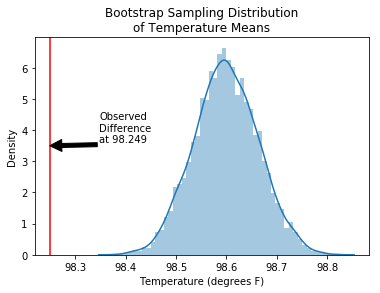

In [289]:
# Compute fraction of replicates that are less than the observed sample mean temperature and greater than 98.95: p_value
p_value = np.sum((bs_replicates <= temp_mean) & (bs_replicates >= 98.6 + (98.6 - temp_mean))) / 10000

# Print the p-value
print('p-value = ', p_value)

# Create a histogram of the bootstrap replicates of mean when recentered at 98.6 degrees
# Add a vertical line at observed mean value from sample temperatures
_ = sns.distplot(bs_replicates, norm_hist = True)
_ = plt.title('Bootstrap Sampling Distribution\nof Temperature Means')
_ = plt.xlabel('Temperature (degrees F)')
_ = plt.ylabel('Density')
_ = plt.axvline(x=temp_mean, color = 'red')
_ = plt.annotate('Observed\nDifference\nat {}'.format(round(temp_mean, 3)), 
                 xy = (temp_mean, 3.5), 
                 xytext = (temp_mean * 1.001, 3.6), 
                 arrowprops = dict(facecolor = 'black'))
plt.show()

6. From p-value and significance level $\alpha$, draw conclusion.

    From the bootstrap hypothesis test, I see that the p-value is zero, so I would reject the null hypothesis that the mean of the true population is 98.6 degrees F.

### One-Sample Frequentist Hypothesis Test: T-Test

* Null Hypothesis: The true population mean is 98.6 degrees F. That is  

$$\mu_{H_0} = 98.6\:degrees\:F$$  

* Alternative Hypothesis: The true population mean is not 98.6 degrees F. That is  

$$\mu_{H_A} \neq 98.6\:degrees\:F$$  

This is a two-sided test.

Since the population standard deviation is not known, using the t-distribution to obtain the p-value would be appropriate here. However, since the sample size is 130, using the normal distribution to generate the p-value should also be okay. I will do both to demonstrate.

I would use the one-sample test as opposed to a two-sample test because I am testing the population mean with a known mean of 98.6 degrees F. If I were testing two unknown population means to see if they were equal, then I would do a two-sample test.

Procedure:

1. Calculate the test statistic by using the following equation:

$$test\:statistic = \frac{\overline{x} - \mu_{H_0}}{s.e.(\,\overline{x}\,)}$$

where

$$s.e.(\,\overline{x}\,) = \frac{standard\:deviation(\,\overline{x}\,)}{\sqrt{n}}$$

where $n$ is the sample size.

In [290]:
# calculate test statistic
test_statistic = (temp_mean - 98.6) / (temp_sd / np.sqrt(len(temperature)))
print('Test statistic is {}.'.format(round(test_statistic, 4)))

Test statistic is -5.4548.


2. Calculate the degrees of freedom using $n - 1$. Then, calculate the p-value using the t-distribution.

In [291]:
# calculate p-value using the t-distribution
degf = len(temperature) - 1
p_value = t.cdf(test_statistic, df = degf) * 2
print('Degrees of freedom is {} and p-value is {}.'.format(degf, round(p_value, 8)))

Degrees of freedom is 129 and p-value is 2.4e-07.


3. Draw conclusion based on the significance level $\alpha$.

    Here, we have a very small p-value. At the 0.05 significance level, I reject the null hypothesis that the sample comes from a distribution with mean 98.6 degrees F.

Let's see this graphically.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


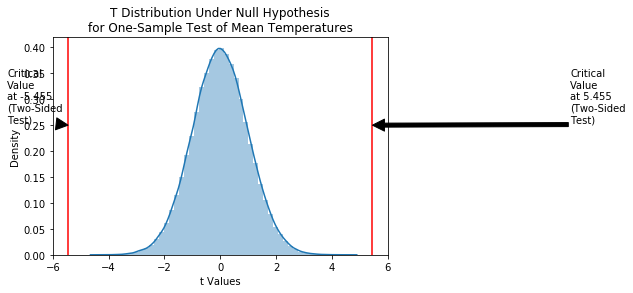

In [292]:
# sample 100000 times from a standard t distribution with df = 129
t_distribution = np.random.standard_t(df = degf, size = 100000)

# generate plot
_ = sns.distplot(t_distribution, norm_hist = True)
_ = plt.axvline(x=test_statistic, color = 'red')
_ = plt.title('T Distribution Under Null Hypothesis\nfor One-Sample Test of Mean Temperatures')
_ = plt.xlabel('t Values')
_ = plt.ylabel('Density')
_ = plt.xlim(-6, 6)
_ = plt.annotate('Critical\nValue\nat {}\n(Two-Sided\nTest)'.format(round(test_statistic, 3)), 
                 xy = (test_statistic, 0.25), 
                 xytext = (test_statistic * 1.4, .255), 
                 arrowprops = dict(facecolor = 'black'))
_ = plt.axvline(x=-test_statistic, color = 'red')
_ = plt.annotate('Critical\nValue\nat {}\n(Two-Sided\nTest)'.format(round(-test_statistic, 3)), 
                 xy = (-test_statistic, .25), 
                 xytext = (-test_statistic * 2.3, .255), 
                 arrowprops = dict(facecolor = 'black'))
plt.show()

From the graph, we can see that the p-value is very small.

### One-Sample Frequentist Hypothesis Test: Z-Test

* Null Hypothesis: The true population mean is 98.6 degrees F
* Alternative Hypothesis: The true population mean is not 98.6 degrees F

Procedure:

1. Calculate the test statistic by using the following equation:

$$test\:statistic = \frac{\overline{x} - \mu_{H_0}}{s.e.(\,\overline{x}\,)}$$

where

$$s.e.(\,\overline{x}\,) = \frac{standard\:deviation(\,\overline{x}\,)}{\sqrt{n}}$$

where $n$ is the sample size.
    
The test statistic was already calculated above while doing the t-test. So, proceed to calculating the p-value.

2. Calculate the p-value using the normal distribution.

In [293]:
# calculate p-value
p_value = norm.cdf(test_statistic) * 2
print('p-value is {}.'.format(round(p_value, 8)))

p-value is 5e-08.


3. Draw conclusion based on the significance level $\alpha$.

    Here, we have a very small p-value. At the 0.05 significance level, I reject the null hypothesis that the sample comes from a distribution with mean 98.6 degrees F.

Let's see this graphically.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


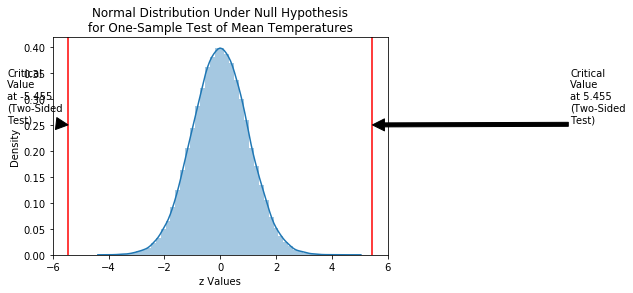

In [294]:
# sample 100000 times from a standard normal distribution
normal_distribution = np.random.normal(size = 100000)

# generate plot
_ = sns.distplot(normal_distribution, norm_hist = True)
_ = plt.axvline(x=test_statistic, color = 'red')
_ = plt.title('Normal Distribution Under Null Hypothesis\nfor One-Sample Test of Mean Temperatures')
_ = plt.xlabel('z Values')
_ = plt.ylabel('Density')
_ = plt.xlim(-6, 6)
_ = plt.annotate('Critical\nValue\nat {}\n(Two-Sided\nTest)'.format(round(test_statistic, 3)), 
                 xy = (test_statistic, 0.25), 
                 xytext = (test_statistic * 1.4, .255), 
                 arrowprops = dict(facecolor = 'black'))
_ = plt.axvline(x=-test_statistic, color = 'red')
_ = plt.annotate('Critical\nValue\nat {}\n(Two-Sided\nTest)'.format(round(-test_statistic, 3)), 
                 xy = (-test_statistic, .25), 
                 xytext = (-test_statistic * 2.3, .255), 
                 arrowprops = dict(facecolor = 'black'))
plt.show()

From the visualization, we can see that the p-value using the normal distribution is also very small.

Although both the t statistic and the z statistic led me to reject the null hypothesis, the t statistic led to a larger p-value. This is to account for the increase in uncertainty that results in estimating the standard deviation of the population. Therefore, by using the t-distribution, p-value would be greater because the t-distribution has fatter tails than a normal distribution.

## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
* Which one is the correct one to use?
    * In this case, since the sample size is small, it would be appropriate to use the t statistic.
* What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?

### One Sample Z Test and t Test for Population Mean

In [295]:
# take 10 random samples with replacement from data and calculate mean and sd
sample = np.random.choice(temperature, size = 10)
sample_mean = np.mean(sample)
sample_sd = statistics.stdev(sample)

In [296]:
# calculate test statistic
test_statistic = (sample_mean - 98.6) / (sample_sd / np.sqrt(len(sample)))
print('test statistic: {}'.format(round(test_statistic, 4)))

test statistic: -0.0709


In [297]:
# z test
p_value = norm.cdf(test_statistic) * 2
print('z test p-value: {}'.format(round(p_value, 4)))

z test p-value: 0.9435


In [298]:
# t test
p_value = t.cdf(test_statistic, df = len(sample) - 1) * 2
print('t test p-value: {}'.format(round(p_value, 4)))

t test p-value: 0.945


The p-values for the two tests are similar. However, the p-value for t-test is larger than the p-value for z-test. This tells me that if the population is normal, then choosing between t statistic and z statistic wouldn't have too big of a difference.

We can also see this graphically.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/root/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


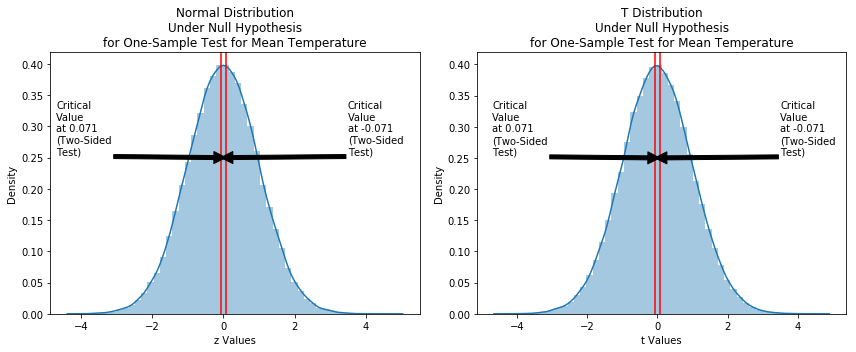

In [299]:
# create plot with two subplots
fig, (z_test, t_test) = plt.subplots(1, 2, figsize = (12, 5))
    
# first plot: standard normal distribution
sns.distplot(normal_distribution, norm_hist = True, ax = z_test)
z_test.axvline(x=test_statistic, color = 'red')
z_test.set_title('Normal Distribution\nUnder Null Hypothesis\nfor One-Sample Test for Mean Temperature')
z_test.set_xlabel('z Values')
z_test.set_ylabel('Density')
z_test.annotate('Critical\nValue\nat {}\n(Two-Sided\nTest)'.format(round(test_statistic, 3)), 
                 xy = (test_statistic, 0.25), 
                 xytext = (3.5, .255), 
                 arrowprops = dict(facecolor = 'black'))
z_test.axvline(x=-test_statistic, color = 'red')
z_test.annotate('Critical\nValue\nat {}\n(Two-Sided\nTest)'.format(round(-test_statistic, 3)), 
                 xy = (-test_statistic, .25), 
                 xytext = (-4.7, .255), 
                 arrowprops = dict(facecolor = 'black'))

# second plot: standard t distribution
sns.distplot(t_distribution, norm_hist = True, ax = t_test)
t_test.axvline(x=test_statistic, color = 'red')
t_test.set_title('T Distribution\nUnder Null Hypothesis\nfor One-Sample Test for Mean Temperature')
t_test.set_xlabel('t Values')
t_test.set_ylabel('Density')
t_test.annotate('Critical\nValue\nat {}\n(Two-Sided\nTest)'.format(round(test_statistic, 3)), 
                 xy = (test_statistic, 0.25), 
                 xytext = (3.5, .255), 
                 arrowprops = dict(facecolor = 'black'))
t_test.axvline(x=-test_statistic, color = 'red')
t_test.annotate('Critical\nValue\nat {}\n(Two-Sided\nTest)'.format(round(-test_statistic, 3)), 
                 xy = (-test_statistic, .25), 
                 xytext = (-4.7, .255), 
                 arrowprops = dict(facecolor = 'black'))
fig.tight_layout()
fig.show()

From the visualizations, we can see that we have high p-values for both z-test and t-test.

## 5. At what temperature should we consider someone's temperature to be "abnormal"?
* As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
* Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

**Bootstrap Approach**

To construct a bootstrap confidence interval, I will create a bootstrap sampling distribution of the sample means and calculate the 2.5th percentile and the 97.5th percentile of the distribution. Hence, the **two-sided** confidence interval will be $(2.5th\:percentile, 97.5th\:percentile)$. Margin of error will be $(sample\:mean - 2.5th\:percentile)$.

In [300]:
# bootstrap confidence interval
bs_replicates = draw_bs_reps(temperature, np.mean, 10000)
conf_95 = np.percentile(bs_replicates, [2.5, 97.5])
print('Bootstrap 95% Confidence Interval is {}'.format(conf_95, 4))

Bootstrap 95% Confidence Interval is [98.12076923 98.37384615]


In [301]:
margin_of_error = temp_mean - np.array(conf_95)
print('Margin of Error is {}'.format(round(margin_of_error[0], 4)))

Margin of Error is 0.1285


/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


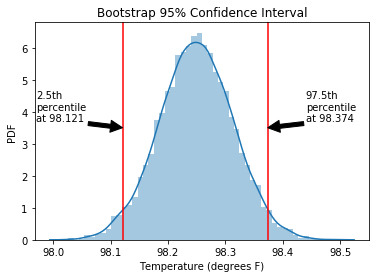

In [302]:
# graph of bootstrap confidence interval
_ = sns.distplot(bs_replicates, norm_hist = True)
_ = plt.axvline(x=conf_95[0], color = 'red')
_ = plt.axvline(x=conf_95[1], color = 'red')
_ = plt.ylabel('PDF')
_ = plt.xlabel('Temperature (degrees F)')
_ = plt.title('Bootstrap 95% Confidence Interval')
_ = plt.annotate('2.5th\npercentile\nat {}'.format(round(conf_95[0], 3)), 
                 xy = (conf_95[0], 3.5), 
                 xytext = (97.97, 3.7), 
                 arrowprops = dict(facecolor = 'black'))
_ = plt.annotate('97.5th\npercentile\nat {}'.format(round(conf_95[1], 3)), 
                 xy = (conf_95[1], 3.5), 
                 xytext = (98.44, 3.7), 
                 arrowprops = dict(facecolor = 'black'))

Bootstrap 95% confidence interval for the population mean temperature is 98.12 degrees F to 98.38 degrees F. Margin of error is $\pm$ 0.12 degrees F. Based on this, the abnormal temperature is below 98.12 degrees F or above 98.38 degrees F.

**Frequentist Approach**

I will construct a 95% confidence interval using both the t distribution as well as a normal distribution.

* For the t-distribution, I will construct a confidence interval using the following:

$$\overline{x} \pm t_{\alpha/2,\:df}* estimated\:standard\:error$$

where

$$estimated\:standard\:error = \frac{sample\:standard\:deviation(\,\overline{x}\,)}{\sqrt{n}}$$

and $\alpha = 0.05$.

* For the normal distribution, I will construct a confidence interval using the following:

$$\overline{x} \pm z_{\alpha/2}* estimated\:standard\:error$$

where

$$estimated\:standard\:error = \frac{sample\:standard\:deviation(\,\overline{x}\,)}{\sqrt{n}}$$

and $\alpha = 0.05$.

In [303]:
# frequentist confidence interval
# 95% CI using t-distribution
t_statistic = t.ppf(q = [.025, .975], df = len(temperature) - 1)
t_statistic

array([-1.97852449,  1.97852449])

In [304]:
# calculate margin of error
margin_of_error = np.array(t_statistic * temp_sd / np.sqrt(len(temperature)))
margin_of_error

array([-0.12722786,  0.12722786])

In [305]:
# calculate 95% CI
conf_95 = temp_mean + margin_of_error
conf_95

array([98.12200291, 98.37645863])

T-distribution 95% confidence interval for the population mean temperature is 98.12 degrees F to 98.38 degrees F. Margin of error is +/- 0.13 degrees F.

In [306]:
# 95% CI using z-distribution
z_statistic = norm.ppf(q = [.025, .975])
z_statistic

array([-1.95996398,  1.95996398])

In [307]:
# calculate margin of error
margin_of_error = z_statistic * temp_sd / np.sqrt(len(temperature))
margin_of_error

array([-0.12603434,  0.12603434])

In [308]:
# 95% CI
conf_95 = temp_mean + margin_of_error
conf_95

array([98.12319643, 98.37526511])

Normal distribution 95% confidence interval for the population mean temperature is 98.12 degrees F to 98.38 degrees F. Margin of error is +/- 0.13 degrees F.

The 95% confidence intervals for the population mean temperature for the three different types - bootstrap, t-distribution, and normal distribution - are all very similar. If we define the normal temperature to be the mean temperature of the population, then, according to these confidence intervals, the abnormal temperatures are temperatures less than 98.12 degrees F or temperatures greater than 98.38 degrees F.

## 6. Is there a significant difference between males and females in normal temperature?
* What testing approach did you use and why?  

    I used the following methods to test this:
    1. Bootstrap test of means - this is to test whether two populations have the same mean when the means of both distributions are unknown.
    2. Two-sample t-test - there are two different distributions that I am comparing: temperature for males and temperature for females. Also, since the population standard deviations are unknown, I will use the t-test.  


* Write a story with your conclusion in the context of the original problem.

First, I will visually inspect the two sample distributions using ECDFs.

In [309]:
female_temp = df.loc[df.gender == 'F', 'temperature']

In [310]:
male_temp = df.loc[df.gender == 'M', 'temperature']

In [311]:
# calculate points for ecdf for males and females
x_male, y_male = ecdf(male_temp)
x_female, y_female = ecdf(female_temp)

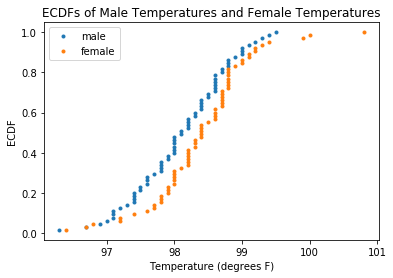

In [312]:
# plot ecdfs of male and female temperatures
_ = plt.plot(x_male, y_male, marker = '.', linestyle = 'none')
_ = plt.plot(x_female, y_female, marker = '.', linestyle = 'none')
_ = plt.legend(('male', 'female'))
_ = plt.title('ECDFs of Male Temperatures and Female Temperatures')
_ = plt.xlabel('Temperature (degrees F)')
_ = plt.ylabel('ECDF')
plt.show()

From the comparison of the ECDFs, it seems that the distribution of male temperatures and female temperatures are different. The male temperatures have overall lower temperatures than the females.

**Bootstrap Test of Means**

* Null Hypothesis: The average temperature between the two distributions are the same
* Alternative Hypothesis: The average temperature between the two distributions are different

Procedure:

1. Combine the two samples and calculate the mean.
2. Recenter the sample means for the two samples.
3. Draw $B$ samples with replacement from the two different recentered samples and calculate the mean. Here, I use $B = 10000$.
4. Calculate the differences of these $B$ sample means between males and females. This will be the bootstrap sampling distribution of the sample difference in means
5. Calculate the p-value as getting the difference in means or more extreme values than the one I observed in the sample. This is a two-sided test.
6. Compare p-value to significance level $\alpha$. In this case, I'll use $\alpha = 0.05$.

In [313]:
# bootstrap test of means

# compute observed means:
empirical_diff_means = np.mean(female_temp) - np.mean(male_temp)

# Generate shifted arrays
female_temp_shifted = female_temp - np.mean(female_temp) + temp_mean
male_temp_shifted = male_temp - np.mean(male_temp) + temp_mean

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(female_temp_shifted, np.mean, 10000)
bs_replicates_b = draw_bs_reps(male_temp_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / 10000 * 2
print('p-value =', p)

p-value = 0.024


/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


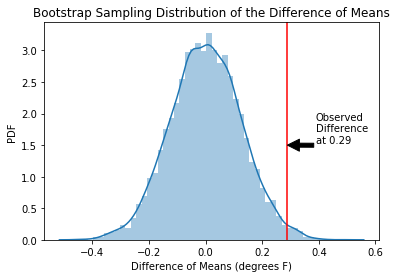

In [314]:
# create plot of bootstrap sampling distribution of difference of means and observed difference
_ = sns.distplot(bs_replicates)
_ = plt.axvline(x=empirical_diff_means, color = 'red')
_ = plt.annotate('Observed\nDifference\nat {}'.format(round(empirical_diff_means, 2)), 
                 xy = (empirical_diff_means, 1.5), 
                 xytext = (empirical_diff_means + 0.1, 1.53), 
                 arrowprops = dict(facecolor = 'black'))
_ = plt.title('Bootstrap Sampling Distribution of the Difference of Means')
_ = plt.xlabel('Difference of Means (degrees F)')
_ = plt.ylabel('PDF')
plt.show()

Since p-value is 0.025, at 0.05 significance level, I will reject the null hypothesis that the means of the two distributions are the same. 

## Two-Sample T-Test

* Null Hypothesis: The average temperature between the two distributions are the same
* Alternative Hypothesis: The average temperature between the two distributions are different

Check Assumptions:

To perform a two-sample t-test, I will first check the following assumptions.

1. Are the distributions independent from each other?
    * Yes. I can assume that the distributions are independent from each other because the original sample was sampled randomly.
2. Are the samples taken independently?
    * Yes. Same reason as assumption 1.
3. Can we assume normal distributions for the sampling distribution of the sample mean for the two samples?
    * Yes. The sample size for both the female temperatures and the male temperatures are greater than 30. Hence, by the CLT, the sampling distribution of the sample mean would be a normal distribution.
4. Do the populations have equal variance?
    * To test this, I will perform an F test for testing equal variance.

Procedure:

1. Assume $\mu_{male_{H_0}} = \mu_{female_{H_0}}$. So, under the null hypothesis, difference in means is zero.
2. Test to see if it's valid to assume whether $\sigma^2_{male} = \sigma^2_{female}$.
    * If the two population standard deviations seem to be equal, then perform the pooled t test. That is, use the following estimate for the standard error:  
    
$$standard\:error = s_p\sqrt{1/n_{male} + 1/n_{female}}$$  

where $$s_p^2 = \frac{(n_{male} - 1)s_{male}^2 + (n_{female} - 1)s_{female}^2}{n_{male} + n_{female} - 2}$$

where  
+ $n_{male}$ is the sample size of male temperatures
+ $n_{female}$ is the sample size of female temperatures
+ $s_{male}^2$ is the sample variance of male temperatures
+ $s_{female}^2$ is the sample variance of female temperatures

and $df = n_{male} + n_{female} - 2$


- If the two population standard deviations seems to be different, then use the unpooled t test using the following estimate for standard error:
    
$$standard\:error = \sqrt{\frac{s_{male}^2}{n_{male}} + \frac{s_{female}^2}{n_{female}}}$$

and $df$ is complicated (usually calculated by software).  

3. Calculate the test statistic:
$$ t = \frac{\overline{x}_{male} - \overline{x}_{female} - 0}{s.e.}$$  

4. Calculate the p-value as getting the difference in means or more extreme values than the one I observed in the sample. This is a two-sided test.
5. Compare p-value to signifance level $\alpha$. In this case, I'll use $\alpha = 0.05$.

**Test of Equal Variance: F Test**

In [315]:
# equal variance f-test
F = np.var(female_temp) / np.var(male_temp) # f-statistic
df1 = len(female_temp) - 1 # degrees of freedom 1
df2 = len(male_temp) - 1 # degrees of freedom 2
p_value = f.cdf(F, df1, df2) # p-value
p_value

0.6894581506101014

Since the p-value is quite high, I can safely assume that the population variances are equal. So, I will use the pooled variance.

**Two-Sample t-Test**

In [316]:
# two-sample t-test
results = ttest_ind(female_temp, male_temp, equal_var = True)
results

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.02393188312239561)

Based on the p-value, at the 0.05 significance level, I will reject the null hypothesis that the two populations have equal temperature means.

Let's examine the two-sample t-test results graphically.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


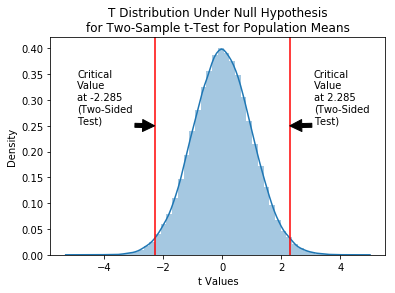

In [317]:
# sample 100000 times from a standard t distribution with df = 128
t_distribution = np.random.standard_t(df = df1 + df2, size = 100000)

test_statistic = results[0]

# generate plot
_ = sns.distplot(t_distribution, norm_hist = True)
_ = plt.axvline(x=test_statistic, color = 'red')
_ = plt.title('T Distribution Under Null Hypothesis\nfor Two-Sample t-Test for Population Means')
_ = plt.xlabel('t Values')
_ = plt.ylabel('Density')
_ = plt.annotate('Critical\nValue\nat {}\n(Two-Sided\nTest)'.format(round(test_statistic, 3)), 
                 xy = (test_statistic, 0.25), 
                 xytext = (3.1, .255), 
                 arrowprops = dict(facecolor = 'black'))
_ = plt.axvline(x=-test_statistic, color = 'red')
_ = plt.annotate('Critical\nValue\nat {}\n(Two-Sided\nTest)'.format(round(-test_statistic, 3)), 
                 xy = (-test_statistic, .25), 
                 xytext = (-4.9, .255), 
                 arrowprops = dict(facecolor = 'black'))
plt.show()

## Conclusion

Based on both the bootstrap test result and the two-sample t-test result, I can see that the normal temperature between the male and the female are different.